In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [7]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).
import requests
import json
url = 'https://api.openweathermap.org/data/2.5/weather'
count = 1
response_json = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
windspeed =[]


for city in cities:   
    try:
        time.sleep(1)
        query_url = url + '?q=' + city + '&appid=' + weather_api_key
        city_response = requests.get(query_url).json()
        response_json.append(city_response)
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        temp.append(city_response['main']['temp'])
        humidity.append(city_response['main']['humidity'])
        clouds.append(city_response['clouds']['all'])
        windspeed.append(city_response['wind']['speed'])
        print('Processing city number ' + str(count) + ' : ' + city)
        
    except:
        print('City number ' + str(count) +" "+ city + 'is not available')
        lat.append('NA')
        lng.append('NA')
        temp.append('NA')
        humidity.append('NA')
        clouds.append('NA')
        windspeed.append('NA')
    count = count + 1

Processing city number 1 : creazzo
Processing city number 2 : mehamn
Processing city number 3 : butaritari
Processing city number 4 : hofn
Processing city number 5 : horasan
Processing city number 6 : aykhal
Processing city number 7 : rikitea
Processing city number 8 : khandyga
Processing city number 9 : gillette
City number 10 tsihombeis not available
Processing city number 11 : awjilah
Processing city number 12 : lorengau
Processing city number 13 : trairi
Processing city number 14 : kapaa
Processing city number 15 : bredasdorp
Processing city number 16 : ambovombe
Processing city number 17 : kodiak
Processing city number 18 : tuktoyaktuk
Processing city number 19 : avarua
Processing city number 20 : hobart
Processing city number 21 : barrow
Processing city number 22 : kisangani
Processing city number 23 : touros
Processing city number 24 : cherskiy
Processing city number 25 : thompson
Processing city number 26 : ushuaia
Processing city number 27 : puerto ayora
Processing city number

Processing city number 216 : emirdag
Processing city number 217 : basco
Processing city number 218 : chuy
Processing city number 219 : puerto escondido
Processing city number 220 : road town
Processing city number 221 : diffa
Processing city number 222 : pisco
Processing city number 223 : coro
Processing city number 224 : faanui
Processing city number 225 : pochutla
Processing city number 226 : isiolo
Processing city number 227 : mehriz
Processing city number 228 : covington
Processing city number 229 : itoman
Processing city number 230 : nichinan
Processing city number 231 : mumford
City number 232 saleaulais not available
City number 233 mys shmidtais not available
Processing city number 234 : vestmannaeyjar
Processing city number 235 : luderitz
Processing city number 236 : santiago del estero
Processing city number 237 : virbalis
Processing city number 238 : san francisco
Processing city number 239 : charcas
Processing city number 240 : troitsko-pechorsk
Processing city number 241 :

Processing city number 429 : kibala
Processing city number 430 : vila franca do campo
Processing city number 431 : fairlie
Processing city number 432 : bereda
Processing city number 433 : bubaque
Processing city number 434 : belaya gora
Processing city number 435 : verkhnevilyuysk
Processing city number 436 : porrentruy
Processing city number 437 : klaksvik
Processing city number 438 : bambanglipuro
Processing city number 439 : grand gaube
Processing city number 440 : kirakira
Processing city number 441 : deputatskiy
Processing city number 442 : aksu
Processing city number 443 : nelson bay
Processing city number 444 : codrington
Processing city number 445 : oranjemund
Processing city number 446 : dudinka
City number 447 umm jarris not available
Processing city number 448 : luganville
Processing city number 449 : sistranda
Processing city number 450 : belvedere marittimo
Processing city number 451 : padang
Processing city number 452 : manta
Processing city number 453 : lazaro cardenas
P

In [8]:
tempF = []
for temperature in temp:
    if temperature != 'NA':
        new_temp = (float(temperature) - 273.15) * 9/5 + 32
    else:
        new_temp = 'NA'
    tempF.append(new_temp)
tempF

[30.14600000000005,
 16.01600000000001,
 81.30200000000008,
 40.46000000000008,
 24.260000000000083,
 -20.03799999999994,
 80.13200000000002,
 9.914000000000033,
 -6.951999999999977,
 'NA',
 49.92800000000007,
 83.71400000000003,
 78.71000000000008,
 77.0,
 69.8,
 75.32600000000009,
 35.6,
 -7.599999999999952,
 84.2,
 69.71000000000008,
 -9.399999999999949,
 71.99600000000005,
 78.8,
 -20.469999999999956,
 -30.999999999999957,
 57.2,
 75.99199999999999,
 76.73000000000005,
 'NA',
 74.31800000000008,
 75.2,
 71.99600000000005,
 80.63600000000007,
 75.52400000000002,
 68.09000000000002,
 12.2,
 52.268000000000086,
 37.4,
 82.184,
 'NA',
 50.791999999999994,
 32.0,
 77.01800000000009,
 -5.115999999999957,
 -7.977999999999966,
 15.998000000000026,
 73.99400000000007,
 60.908,
 28.88600000000007,
 1.3999999999999986,
 55.202000000000076,
 -2.109999999999978,
 32.0,
 73.02200000000003,
 12.578000000000067,
 -34.13199999999998,
 'NA',
 71.99600000000005,
 24.422000000000036,
 79.0339999999999

In [9]:
#Convert Raw Data to DataFrame
#Display the DataFrame

weather_dict={"City": cities,
             "Latitude": lat,
              "Longitude": lng,
             "Temperature (F)": tempF,
             "Humidity (%)": humidity,
             "Cloudiness (%)": clouds,
             "Windspeed (mph)": windspeed}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
0,creazzo,45.532,11.4785,30.146,36,100,5.18
1,mehamn,71.0357,27.8492,16.016,93,67,2.91
2,butaritari,3.0707,172.79,81.302,83,2,5.06
3,hofn,64.2539,-15.2082,40.46,74,100,9.08
4,horasan,40.0458,42.1728,24.26,90,56,0.55
...,...,...,...,...,...,...,...
628,ramanuj ganj,23.8,83.7,69.854,30,0,1.09
629,nuuk,64.1835,-51.7216,18.302,86,90,6.17
630,vigrestad,58.5667,5.7,13.532,92,0,2.1
631,bury saint edmunds,NA,NA,NA,NA,NA,NA


In [10]:
#Export the city data into a .csv.
weather_data.to_csv('weatherdata.csv', index=False, header = True)

In [12]:
#Clean data
clean_weather = weather_data.loc[(weather_data["Latitude"] != "NA"), :]
clean_weather


,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Windspeed (mph)
0,creazzo,45.532,11.4785,30.146,36,100,5.18
1,mehamn,71.0357,27.8492,16.016,93,67,2.91
2,butaritari,3.0707,172.79,81.302,83,2,5.06
3,hofn,64.2539,-15.2082,40.46,74,100,9.08
4,horasan,40.0458,42.1728,24.26,90,56,0.55
...,...,...,...,...,...,...,...
627,ust-maya,60.4167,134.533,10.85,91,46,1.19
628,ramanuj ganj,23.8,83.7,69.854,30,0,1.09
629,nuuk,64.1835,-51.7216,18.302,86,90,6.17
630,vigrestad,58.5667,5.7,13.532,92,0,2.1


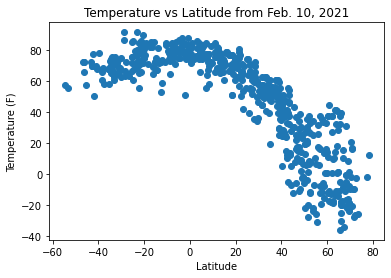

In [13]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot
Latitude = clean_weather['Latitude']
Temp = clean_weather['Temperature (F)']

plt.scatter(Latitude, Temp)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude from Feb. 10, 2021')

plt.savefig('TempVLat.png')
plt.show()

#This graph shows that the higher temperatures typically came from the Southern Hemisphere where it is currently summer or
#where it is closer to the equater. The coldest temperatures are further from the equater in the Northern Hemisphere where
#it is currently winter.

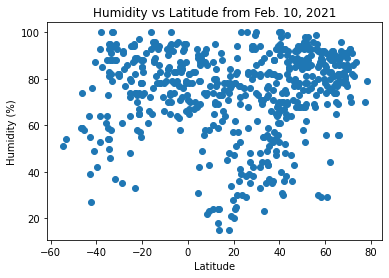

In [14]:
#Latitude vs. Humidity Plot

Humidity = clean_weather['Humidity (%)']

plt.scatter(Latitude, Humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude from Feb. 10, 2021')

plt.savefig('HumidVLat.png')
plt.show()

#This plot does not appear to show a very close correlation between whether latitude might have an impact on humidity. 

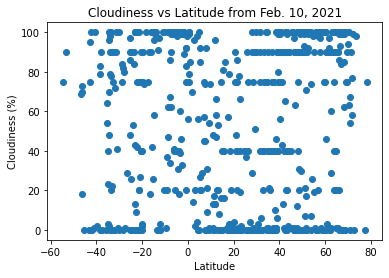

In [15]:
#Latitude vs. Cloudiness Plot
Cloudiness = clean_weather['Cloudiness (%)']

plt.scatter(Latitude, Cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude from Feb. 10, 2021')

plt.savefig('CloudVLat.png')
plt.show()

#This plot does not appear to show a very close correlation between whether latitude might have an impact on cloud coverage. 

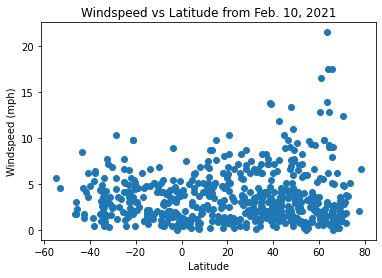

In [16]:
#Latitude vs. Wind Speed Plot
Wind = clean_weather['Windspeed (mph)']

plt.scatter(Latitude, Wind)
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Windspeed vs Latitude from Feb. 10, 2021')

plt.savefig('WindVLat.png')
plt.show()

#This plot does not appear to show a very close correlation between whether latitude might have an impact on windspeed. 

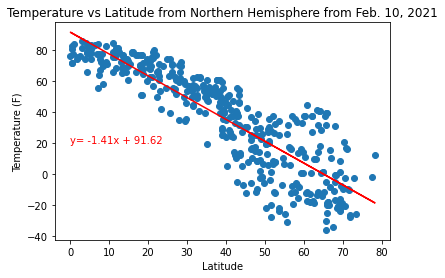

-0.8685850545817752


In [17]:
#Linear Regression
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
North_Hemi = clean_weather.loc[(clean_weather['Latitude']>0),:]
North_Hemi

North_lat = North_Hemi['Latitude']
North_temp = North_Hemi['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_temp.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_temp)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(0,20), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthTempVLat.png')
plt.show()

print(rvalue)

#This data shows a strong negative correlation between latitude and longitude as shown by a large negative r value and a 
#large negative slope.

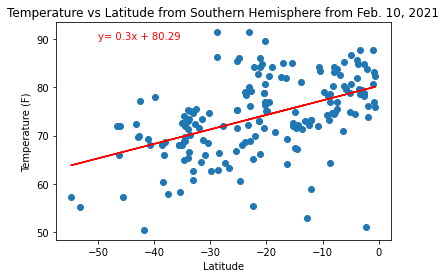

0.4873349722461654


In [18]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
South_Hemi = clean_weather.loc[(clean_weather['Latitude']<0),:]
South_Hemi

South_lat = South_Hemi['Latitude']
South_temp = South_Hemi['Temperature (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_temp.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_temp)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-50,90), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthTempVLat.png')
plt.show()
print (rvalue)

#This graph shows less correlation to latitude and temperature than the northern hemisphere, but there is still a positive
#correlation as shown by a positive r value and small slope.

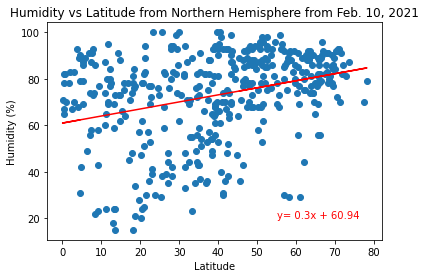

0.312193608533269


In [19]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
North_humid = North_Hemi['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_humid.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_humid)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(55,20), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthHumidVLat.png')
plt.show()
print (rvalue)

#This data has little correlation since both the slope and r value are fairly close to 0.

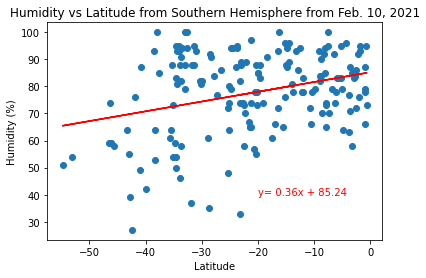

0.310761898248876


In [21]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
South_humid = South_Hemi['Humidity (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_humid.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_humid)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-20,40), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthHumidVLat.png')
plt.show()
print (rvalue)

#This data has little correlation since both the slope and r value are fairly close to 0.

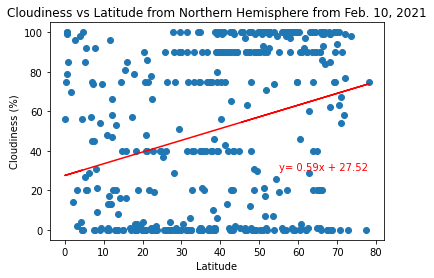

0.28895646351783094


In [22]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
North_cloud = North_Hemi['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_cloud.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_cloud)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(55,30), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthCloudVLat.png')
plt.show()
print (rvalue)

#This data has little correlation since both the slope and r value are fairly close to 0.

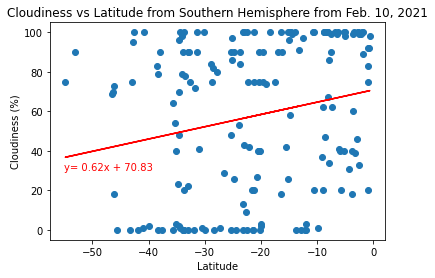

0.2125796923574185


In [23]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
South_cloud = South_Hemi['Cloudiness (%)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_cloud.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_cloud)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-55,30), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthCloudVLat.png')
plt.show()
print (rvalue)

#This data has little correlation since both the slope and r value are fairly close to 0.

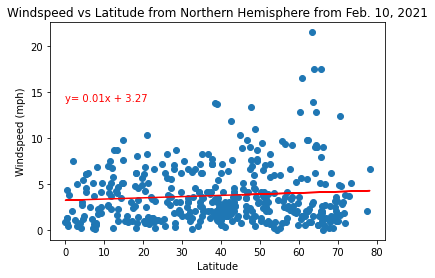

0.08467969427262874


In [24]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
North_wind = North_Hemi['Windspeed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(North_lat.astype(float), North_wind.astype(float))
regress_values = North_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(North_lat, North_wind)
plt.plot(North_lat, regress_values, "r-")
plt.annotate(line_eq,(0,14), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Windspeed vs Latitude from Northern Hemisphere from Feb. 10, 2021')
plt.savefig('NorthWindVLat.png')
plt.show()
print (rvalue)

#This data essentially no correlation since both the slope and r value are nearly 0.

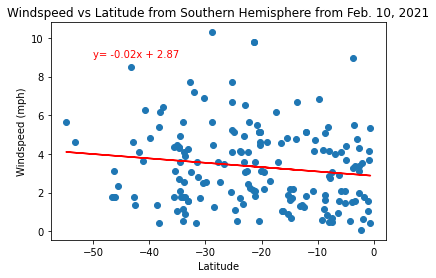

-0.14337726503085302


In [26]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
South_wind = South_Hemi['Windspeed (mph)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(South_lat.astype(float), South_wind.astype(float))
regress_values = South_lat * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(South_lat, South_wind)
plt.plot(South_lat, regress_values, "r-")
plt.annotate(line_eq,(-50, 9), color= 'red')

plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.title('Windspeed vs Latitude from Southern Hemisphere from Feb. 10, 2021')
plt.savefig('SouthWindVLat.png')
plt.show()

print (rvalue)

#This data has little correlation since both the slope and r value are fairly close to 0.